In [2]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
rec = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [3]:
rec

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [4]:
covid_dna = recs[0].seq

In [5]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [7]:
print(f'The gene of Covid-19 consists of {len(covid_dna)} nucleotides.')

The gene of Covid-19 consists of 29903 nucleotides.


In [8]:
# to calculate the molecular wieght

In [9]:
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [10]:
from Bio.SeqUtils import GC
GC(covid_dna)

C:\Users\shiri\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\SeqUtils\__init__.py:144: BiopythonDeprecationWarning: GC is deprecated; please use gc_fraction instead.
  warnings.warn(


37.97277865097148

In [11]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [12]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

In [13]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [14]:
#common acids


In [16]:
covid_aa = covid_mrna.translate()
covid_aa

C:\Users\shiri\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\Seq.py:2804: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [17]:
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [18]:
#delete the amino acid

In [19]:
#protien frequency

Text(0.5, 1.0, 'Protein Sequence Frequency')

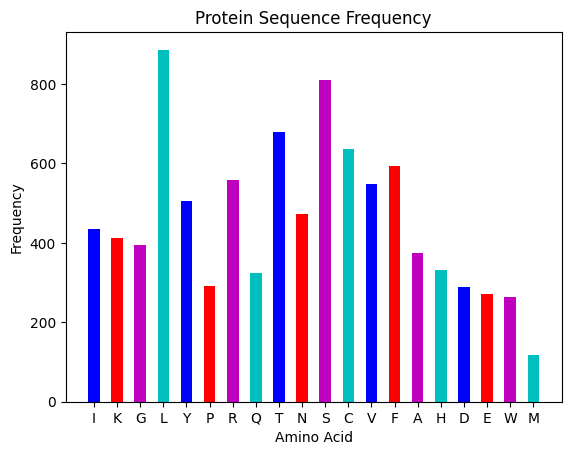

In [20]:
import matplotlib.pyplot as plt
del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [21]:
print(f"Covid-19's gene has  {sum(common_amino.values())} amount of  amino acids")

Covid-19's gene has  9193 amount of  amino acids


In [22]:
proteins = covid_aa.split('*')

In [24]:
proteins[:10]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR'),
 Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'),
 Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'),
 Seq('RWHLWLSRS'),
 Seq('KRRFAST'),
 Seq('TALCVHQTFGCSNCTSWSCYG')]

In [25]:
print(f'We have {len(proteins)} amino acids in the covid-19 genome')

We have 775 amino acids in the covid-19 genome


In [26]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [27]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [28]:
top_10_proteins = sorted(proteins, key = len)

In [29]:
top_10_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [30]:
len(top_10_proteins[-1])

2701

In [32]:
with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_10_proteins[-1]}")

In [33]:
from Bio import SeqIO
for sequence in SeqIO.parse('protein_seq.fasta', "fasta"):
    print(sequence.id)
    print(sequence.seq)

covid
CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYL

In [34]:

## loop through sequences and split into individual nucleotides

In [35]:
sequences = list(sequence.seq)
dataset = {}


for i, seq in enumerate(sequence.seq):
    
    # splited into nucleotides, removed tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset)

{0: ['C'], 1: ['T'], 2: ['I'], 3: ['V'], 4: ['F'], 5: ['K'], 6: ['R'], 7: ['V'], 8: ['C'], 9: ['G'], 10: ['V'], 11: ['S'], 12: ['A'], 13: ['A'], 14: ['R'], 15: ['L'], 16: ['T'], 17: ['P'], 18: ['C'], 19: ['G'], 20: ['T'], 21: ['G'], 22: ['T'], 23: ['S'], 24: ['T'], 25: ['D'], 26: ['V'], 27: ['V'], 28: ['Y'], 29: ['R'], 30: ['A'], 31: ['F'], 32: ['D'], 33: ['I'], 34: ['Y'], 35: ['N'], 36: ['D'], 37: ['K'], 38: ['V'], 39: ['A'], 40: ['G'], 41: ['F'], 42: ['A'], 43: ['K'], 44: ['F'], 45: ['L'], 46: ['K'], 47: ['T'], 48: ['N'], 49: ['C'], 50: ['C'], 51: ['R'], 52: ['F'], 53: ['Q'], 54: ['E'], 55: ['K'], 56: ['D'], 57: ['E'], 58: ['D'], 59: ['D'], 60: ['N'], 61: ['L'], 62: ['I'], 63: ['D'], 64: ['S'], 65: ['Y'], 66: ['F'], 67: ['V'], 68: ['V'], 69: ['K'], 70: ['R'], 71: ['H'], 72: ['T'], 73: ['F'], 74: ['S'], 75: ['N'], 76: ['Y'], 77: ['Q'], 78: ['H'], 79: ['E'], 80: ['E'], 81: ['T'], 82: ['I'], 83: ['Y'], 84: ['N'], 85: ['L'], 86: ['L'], 87: ['K'], 88: ['D'], 89: ['C'], 90: ['P'], 91: ['A'

In [36]:
import numpy as np
import pandas as pd

In [37]:
df = pd.DataFrame(dataset)
print(df)

  0    1    2    3    4    5    6    7    8    9     ... 2691 2692 2693 2694  \
0    C    T    I    V    F    K    R    V    C    G  ...    V    I    S    S   

  2695 2696 2697 2698 2699 2700  
0    D    V    L    V    N    N  

[1 rows x 2701 columns]


In [38]:
#dataframe transpose
dft = df.transpose()
print(dft.iloc[:5])

   0
0  C
1  T
2  I
3  V
4  F


In [39]:
dft.describe()

,0
count,2701
unique,20
top,L
freq,233


In [42]:
series = []
for name in dft.columns:
    series.append(dft[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)

   count
0       
L    233
V    229
T    183
A    179
D    178
S    162
K    159
N    151
G    149
F    143
Y    140
I    129
R    113
P    110
E    101
C     89
Q     88
H     70
M     63
W     32


In [43]:
#converting string values to numerical values as ML algorithm runs on the numerical value

In [44]:
numerical_dft = pd.get_dummies(dft)
numerical_dft.iloc[:5]

,0_A,0_C,0_D,0_E,0_F,0_G,0_H,0_I,0_K,0_L,0_M,0_N,0_P,0_Q,0_R,0_S,0_T,0_V,0_W,0_Y
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
from sklearn import model_selection

#Creating X and Y datasets for training
X = np.array(numerical_dft)
y = np.array(numerical_dft)


# defined seed for reproducibility
seed = 1

# splitinng data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

scoring = 'accuracy'

#knn classifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [47]:
#knn model
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        60
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00        46
          17       1.00

In [48]:
import numpy as np
import pandas as pd

In [49]:
names = ['Class', 'id', 'Sequence']
data =  pd.read_csv('promoters.data', names = names)
print(data)

    Class         id                                           Sequence
0       +        S10  \t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1       +       AMPC  \t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2       +       AROH  \t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3       +      DEOP2  \taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4       +  LEU1_TRNA  \ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
..    ...        ...                                                ...
101     -        799  \t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102     -        987  \t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103     -       1226  \t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104     -        794  \t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...
105     -       1442  \t\ttaacattaataaataaggaggctctaatggcactcattagcc...

[106 rows x 3 columns]


In [50]:
classes = data.loc[:, 'Class']
print(classes[:10])

0    +
1    +
2    +
3    +
4    +
5    +
6    +
7    +
8    +
9    +
Name: Class, dtype: object


In [51]:
sequences = list(data.loc[:, 'Sequence'])
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    
    # split into nucleotides, remove tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    # append class assignment
    nucleotides.append(classes[i])
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [52]:
df = pd.DataFrame(dataset)
print(df)

   0   1   2   3   4   5   6   7   8   9    ... 96  97  98  99  100 101 102  \
0    t   t   g   a   t   a   c   t   c   t  ...   c   c   t   a   g   c   g   
1    a   g   t   a   c   g   a   t   g   t  ...   c   g   a   g   a   c   t   
2    c   c   a   t   g   g   g   t   a   t  ...   g   c   t   a   g   t   a   
3    t   t   c   t   a   g   g   c   c   t  ...   a   t   g   g   a   c   t   
4    a   a   t   g   t   g   g   t   t   a  ...   g   a   a   g   g   a   t   
5    g   t   a   t   a   c   g   a   t   a  ...   t   g   c   g   c   a   c   
6    c   c   g   g   a   a   g   c   a   a  ...   a   g   c   t   a   t   t   
7    a   c   a   a   t   a   t   a   a   t  ...   g   a   g   g   t   g   c   
8    a   t   g   t   t   g   g   a   t   t  ...   a   c   a   t   g   g   a   
9    t   g   a   g   a   g   g   a   a   t  ...   c   t   a   a   t   c   a   
10   a   a   a   t   a   a   a   a   t   c  ...   c   t   c   c   c   c   c   
11   c   c   c   g   c   g   g   c   a   c  ...   c 

In [53]:
dft = df.transpose()
print(dft.iloc[:10])

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t  +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  +
5  a  g  g  g  g  c  a  a  g  g  ...  c  g  t  t  t  a  g  g  t  +
6  c  a  g  g  g  g  g  t  g  g  ...  a  t  c  a  t  g  a  a  t  +
7  t  t  t  c  t  a  c  a  a  a  ...  a  a  c  a  g  a  a  c  a  +
8  c  g  a  c  t  t  a  a  t  a  ...  a  a  a  t  g  g  t  t  t  +
9  t  t  t  t  a  a  a  t  t  t  ...  c  c  a  c  t  g  a  c  a  +

[10 rows x 58 columns]


In [54]:
dft.rename(columns = {57: 'Class'}, inplace = True) 
print(dft.iloc[:10])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  a  c  t  a  g  c  a  a  t  ...  g  c  t  t  g  t  c  g  t     +
1  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     +
2  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     +
3  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     +
4  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     +
5  a  g  g  g  g  c  a  a  g  g  ...  c  g  t  t  t  a  g  g  t     +
6  c  a  g  g  g  g  g  t  g  g  ...  a  t  c  a  t  g  a  a  t     +
7  t  t  t  c  t  a  c  a  a  a  ...  a  a  c  a  g  a  a  c  a     +
8  c  g  a  c  t  t  a  a  t  a  ...  a  a  a  t  g  g  t  t  t     +
9  t  t  t  t  a  a  a  t  t  t  ...  c  c  a  c  t  g  a  c  a     +

[10 rows x 58 columns]


In [55]:
dft.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,...,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,...,36,42,31,33,35,32,29,29,34,53


In [56]:
series = []
for name in dft.columns:
    series.append(dft[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)

   count  count  count  count  count  count  count  count  count  count  ...  \
t   38.0   26.0   27.0   26.0   22.0   24.0   30.0   32.0   32.0   28.0  ...   
c   27.0   22.0   21.0   30.0   19.0   18.0   21.0   20.0   22.0   22.0  ...   
a   26.0   34.0   30.0   22.0   36.0   42.0   38.0   34.0   33.0   36.0  ...   
g   15.0   24.0   28.0   28.0   29.0   22.0   17.0   20.0   19.0   20.0  ...   
+    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   
-    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  ...   

   count  count  count  count  count  count  count  count  count  count  
t   21.0   22.0   23.0   33.0   35.0   30.0   23.0   29.0   34.0    NaN  
c   36.0   42.0   31.0   32.0   21.0   32.0   29.0   29.0   17.0    NaN  
a   23.0   24.0   28.0   27.0   25.0   22.0   26.0   24.0   27.0    NaN  
g   26.0   18.0   24.0   14.0   25.0   22.0   28.0   24.0   28.0    NaN  
+    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   53

In [57]:
numerical_dft = pd.get_dummies(dft)
numerical_dft.iloc[:10]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False
5,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
6,False,True,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
7,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
8,False,True,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,True,True,False
9,False,False,False,True,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False


In [58]:
dft = numerical_dft.drop(columns=['Class_-'])

dft.rename(columns = {'Class_+': 'Class'}, inplace = True)
print(dft.iloc[:10])

     0_a    0_c    0_g    0_t    1_a    1_c    1_g    1_t    2_a    2_c  ...  \
0  False  False  False   True   True  False  False  False  False   True  ...   
1  False  False  False   True  False  False   True  False  False   True  ...   
2  False  False   True  False  False  False  False   True   True  False  ...   
3   True  False  False  False   True  False  False  False  False  False  ...   
4  False  False  False   True  False   True  False  False  False  False  ...   
5   True  False  False  False  False  False   True  False  False  False  ...   
6  False   True  False  False   True  False  False  False  False  False  ...   
7  False  False  False   True  False  False  False   True  False  False  ...   
8  False   True  False  False  False  False   True  False   True  False  ...   
9  False  False  False   True  False  False  False   True  False  False  ...   

    54_t   55_a   55_c   55_g   55_t   56_a   56_c   56_g   56_t  Class  
0  False  False  False   True  False  False  

In [63]:
from sklearn import model_selection
# Create X and Y datasets for training
X = np.array(dft.drop('Class', axis=1))  # Remove the second argument '2'
y = np.array(dft['Class'])
# define seed for reproducibility


In [64]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [65]:
scoring = 'accuracy'

svm = SVC(kernel = 'linear')

In [78]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
clf = SVC()

clf.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (2025, 20) instead.

In [95]:
# using xgboost alogrithm

In [79]:
import xgboost as xgb


In [80]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)


In [81]:
params = {
    'objective': 'binary:logistic',  # for binary classification
    'max_depth': 3,                 # maximum depth of the tree
    'eta': 0.1,                     # learning rate
    'eval_metric': 'logloss'        # evaluation metric
}


In [82]:
num_round = 100  # number of boosting rounds (you can adjust this)
bst = xgb.train(params, dtrain, num_round)


In [83]:
y_pred = bst.predict(dtest)


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [99]:
# Evaluate the model
threshold = 0.5  # Adjust this threshold based on your problem
y_pred_binary = [1 if p > threshold else 0 for p in y_pred]

if my_array.any():
    # Code to execute if any element in my_array is True
    else:
        
        print(my_array.all())
    
    # Code to execute if all elements in my_array are False




SyntaxError: invalid syntax (3444580901.py, line 7)